In [50]:
##### Importing packages
!pip install yfinance 
!pip install pandas_datareader
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import pandas_datareader.data as pdr
import yfinance as yf
from datetime import datetime, timedelta
yf.pdr_override()
start_date = datetime(2019, 9, 1)
print("Starting date:", start_date)
# end_date = datetime.now()
end_date = datetime(2022, 9, 1)
print("Ending date:", end_date)

stock_symbol = ['AAPL']

stock_aapl= pdr.get_data_yahoo(stock_symbol, start_date, end_date)

Starting date: 2019-09-01 00:00:00
Ending date: 2022-09-01 00:00:00
[*********************100%***********************]  1 of 1 completed


In [2]:
stock_aapl

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-09-03,51.607498,51.744999,51.055000,51.424999,50.312431,80092000
2019-09-04,52.097500,52.369999,51.830002,52.297501,51.166061,76752400
2019-09-05,53.000000,53.492500,52.877499,53.320000,52.166439,95654800
2019-09-06,53.512501,53.605000,53.127499,53.314999,52.161549,77449200
2019-09-09,53.709999,54.110001,52.767502,53.542500,52.384117,109237600
...,...,...,...,...,...,...
2022-08-25,168.779999,170.139999,168.350006,170.029999,170.029999,51218200
2022-08-26,170.570007,171.050003,163.559998,163.619995,163.619995,78961000
2022-08-29,161.149994,162.899994,159.820007,161.380005,161.380005,73314000


In [3]:
aapl=stock_aapl[["Adj Close"]]

In [4]:
aapl

,Adj Close
Date,
2019-09-03,50.312431
2019-09-04,51.166061
2019-09-05,52.166439
2019-09-06,52.161549
2019-09-09,52.384117
...,...
2022-08-25,170.029999
2022-08-26,163.619995
2022-08-29,161.380005


### AAPL Returns


In [12]:
returns_aapl= aapl[['Adj Close']].pct_change()

In [95]:
ret_aapl=returns_aapl.dropna()
print("AAPL returns")
ret_aapl

AAPL returns


,Adj Close
Date,
2019-09-04,0.016967
2019-09-05,0.019552
2019-09-06,-0.000094
2019-09-09,0.004267
2019-09-10,0.011813
...,...
2022-08-25,0.014923
2022-08-26,-0.037699
2022-08-29,-0.013690


### SPY Returns

In [35]:
start_date1 = datetime(2019, 9, 1)
# end_date = datetime.now()
end_date1 = datetime(2022, 9, 1)

stock_symbol1 = ['SPY']

stock_spy= pdr.get_data_yahoo(stock_symbol1, start_date1, end_date1)
spy=stock_spy[["Adj Close"]]
returns_spy= spy[['Adj Close']].pct_change()
spy=returns_spy.dropna()

[*********************100%***********************]  1 of 1 completed


In [36]:
spy

,Adj Close
Date,
2019-09-04,0.011351
2019-09-05,0.012855
2019-09-06,0.000772
2019-09-09,0.000503
2019-09-10,-0.000235
...,...
2022-08-25,0.014118
2022-08-26,-0.033849
2022-08-29,-0.006612


### Design Matrix

In [53]:
design_matrix    = pd.merge(ret_aapl,spy, on= 'Date')
dict = {'Adj Close_x': 'Return_aapl',
        'Adj Close_y': 'Return_spy'}
 
# call rename () method
design_matrix.rename(columns=dict,
          inplace=True)

In [92]:
design_matrix
#design_matrix.to_csv("C:\\Users\\KD129201\\ass4.csv")

,Return_aapl,Return_spy
Date,,
2019-09-04,0.016967,0.011351
2019-09-05,0.019552,0.012855
2019-09-06,-0.000094,0.000772
2019-09-09,0.004267,0.000503
2019-09-10,0.011813,-0.000235
...,...,...
2022-08-25,0.014923,0.014118
2022-08-26,-0.037699,-0.033849
2022-08-29,-0.013690,-0.006612


### Conduct quantile regression and estimate 20% and 80% quantile

In [61]:
model_20 = smf.quantreg('Return_aapl ~ Return_spy', design_matrix).fit(q=0.2)

In [62]:
model_20.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:            Return_aapl   Pseudo R-squared:               0.4515
Model:                       QuantReg   Bandwidth:                    0.004604
Method:                 Least Squares   Sparsity:                      0.03726
Date:                Thu, 29 Sep 2022   No. Observations:                  755
Time:                        11:12:10   Df Residuals:                      753
                                        Df Model:                            1
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0081      0.001    -14.904      0.000      -0.009      -0.007
Return_spy     1.1968      0.039     30.815      0.000       1.121       1.273
==============================================================================
"""

In [63]:
model_80 = smf.quantreg('Return_aapl ~ Return_spy', design_matrix).fit(q=0.8)

In [64]:
model_80.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:            Return_aapl   Pseudo R-squared:               0.3865
Model:                       QuantReg   Bandwidth:                    0.004644
Method:                 Least Squares   Sparsity:                      0.04768
Date:                Thu, 29 Sep 2022   No. Observations:                  755
Time:                        11:12:33   Df Residuals:                      753
                                        Df Model:                            1
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0094      0.001     13.496      0.000       0.008       0.011
Return_spy     1.2103      0.056     21.709      0.000       1.101       1.320
==============================================================================
"""

### SPY vs AAPL returns Plot 

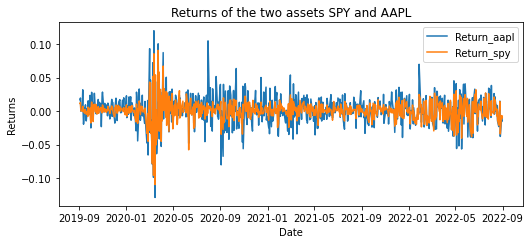

In [75]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
plt.plot(design_matrix)
bottom,top = plt.ylim()

#print("Bottom value:",left,"\n","Top Value:",right)

# Add Title


plt.title("Returns of the two assets SPY and AAPL") 

# Add Axes Labels

plt.xlabel("Date") 
plt.ylabel("Returns") 
plt.legend(design_matrix)
# Display

plt.show()

### Quantile Plot

In [76]:
print(model_80.params)

Intercept     0.009397
Return_spy    1.210257
dtype: float64


In [81]:
print(model_20.params)

Intercept    -0.008107
Return_spy    1.196783
dtype: float64


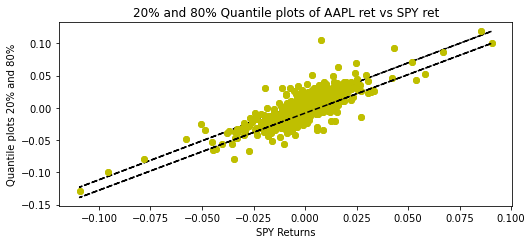

In [94]:
x= design_matrix['Return_spy']
y= design_matrix['Return_aapl']
# extract intercept b and slope m
b, m = model_80.params
b1,m1 = model_20.params
plt.plot(x, y, 'yo', x, m*x+b, '--k')
plt.plot(x, y, 'yo', x, m1*x+b1, '--k')
plt.xlabel("SPY Returns") 
plt.ylabel("Quantile plots 20% and 80%") 
plt.title("20% and 80% Quantile plots of AAPL ret vs SPY ret") 
plt.show()
# plot y = m*x + b
#plt.axline(xy1=(0, b), slope=m, label=f'$y = {m:.1f}x {b:+.1f}$')